<h1>Business Understanding</h1>
<h2>The CIFAR-10 Dataset</h2>
<h3>Overview</h3>
<p>
The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images. The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 5000 images from each class. 
</p>

<p>
    <ul>
        <li>Airplane</li>
        <li>Automobile</li>
        <li>Bird</li>
        <li>Cat</li>
        <li>Deer</li>
        <li>Dog</li>
        <li>Frog</li>
        <li>Horse</li>
        <li>Ship</li>
        <li>Truck</li>
    </ul>
</p>

<p>The classes are completely mutually exclusive. There is no overlap between automobiles and trucks. "Automobile" includes sedans, SUVs, things of that sort. "Truck" includes only big trucks. Neither includes pickup trucks.</p>

<h3>Purpose of the Dataset</h3>
<p>To train machine learning and computer vision algorithms, as these algorithms learn to recognize objects in images by example.</p>
<h3>Why was the data collected in the first place?</h3>
<p>The data was collected by the Canadian Institute for Advanced Research (CIFAR). It is a labeled subset of the 80 million tiny images dataset. Students were paid to label those images. This dataset was built primarily for machine learning reasearch.</p>
<h3>Prediction Task</h3>
<p>The task is to be able to accurately classify the images by labels. There are 10 classes and labels in this dataset. As this dataset was primarily built for machine learning research, educational institutions and researchers would be most interested in this dataset to train and test their algorithms. The importance of this dataset lies in its versatility and simplicity; it is a clean dataset with a clear prediction task that can be used to train algorithms.</p>

<h3>Business Case: Once you begin modeling, how well would your prediction algorithm need to perform to be considered useful to the identified third parties</h3>
<p>A cloud image service like imgur could utilize an image classifer to classify every image that gets uploaded to their servers. Image classification could be important to exclude certain images from getting uploaded, as manually surfing through all uploaded images is inefficient and impractical. So it would function as a filter. It could also serve to classify the content of those images and assign a label for each. While this is a relatively small subset of images (I will be working on 3000 of the 60000 images of this dataset) with a small number of classes (10), it would serve to test the performance of different prediction algorithms. Having said that, the prediction algorithm would need to be very accurate to be useful for those uses. A margin of 97% accuracy is selected in this case. Identifying a car as a frog is unacceptable, as an example.</p>

<h1>Data Preparation</h1>

<h2>Reading in The Images</h2>

In [4]:
# Loading (unpickling) the data for later processing
import numpy as np
import pickle
from matplotlib import pyplot as plt
%matplotlib inline

def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dicts = pickle.load(fo, encoding='bytes')
        images = dicts[b'data']
        labels = dicts[b'labels']
        imageArray = np.array(images)
        labelArray = np.array(labels).reshape((10000, 1))
    return imageArray, labelArray

In [5]:
# These are the data and class variables (targets)
first_batch_images, first_batch_labels = unpickle('cifar-10-batches-py\data_batch_1')
second_batch_images, second_batch_labels = unpickle('cifar-10-batches-py\data_batch_2')
third_batch_images, third_batch_labels = unpickle('cifar-10-batches-py\data_batch_3')
fourth_batch_images, fourth_batch_labels = unpickle('cifar-10-batches-py\data_batch_4')
fifth_batch_images, fifth_batch_labels = unpickle('cifar-10-batches-py\data_batch_5')

images = np.vstack((first_batch_images, second_batch_images, third_batch_images, fourth_batch_images, fifth_batch_images))
image_labels = np.vstack((first_batch_labels, second_batch_labels, third_batch_labels, fourth_batch_labels, fifth_batch_labels))
images_array = np.hstack((images, image_labels))

# Here we randomly shuffle the rows of the image batch arrays
np.random.shuffle(images_array)

# Then we slice the array back into the features and target arrays
images, image_labels = images_array[:, :-1], images_array[:, -1]

<h2>Processing the images: Recoloring and Linearization</h2>

In [7]:
# First, we initialize numpy arrays to process the five batches
# The images are 32x32 each, and each row in the original arrays represents the image.
# First comes the 32x32 = 1024 red channel followed by 1024 entries of green and then 1024 entries of blue, making the lenfth of each row 3072
# I convert them to grayscale and map them into a new numpy array for later processing
# I only work with 3000 train images because of the processing time it takes to deal with 50000 images. And memory limits.
# The 1000 test images will be used to test classification

train_image_count = 3000
test_image_count = 1000

train_image_labels = image_labels[0:train_image_count]
test_image_labels = image_labels[train_image_count:train_image_count+1000]

greyscale_images = np.zeros((train_image_count, 1024))
test_images = np.zeros((test_image_count, 1024))


for image_idx in range(greyscale_images.shape[0]):
    for i in range(1024):
        greyscale_images[image_idx, i] = 0.3*images[image_idx, i] +  0.59*images[image_idx, i + 1024] + 0.11*images[image_idx, i + 2048]
        
for image_idx in range(test_images.shape[0]):
    for i in range(1024):
        test_images[image_idx, i] = 0.3*images[3000 + image_idx, i] +  0.59*images[3000 + image_idx, i + 1024] + 0.11*images[3000 + image_idx, i + 2048]

In [8]:
n_samples, n_features = greyscale_images.shape

# As given by the dataset
h, w = 32, 32

labels = np.array(['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck'])
n_classes = len(labels)

In [48]:
def plot_gallery(images, titles, h, w, n_row=3, n_col=11):
    plt.figure(figsize = (1.6 * n_col, 1.6 * n_row))
    
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

<h2>Several Processed Images</h2>

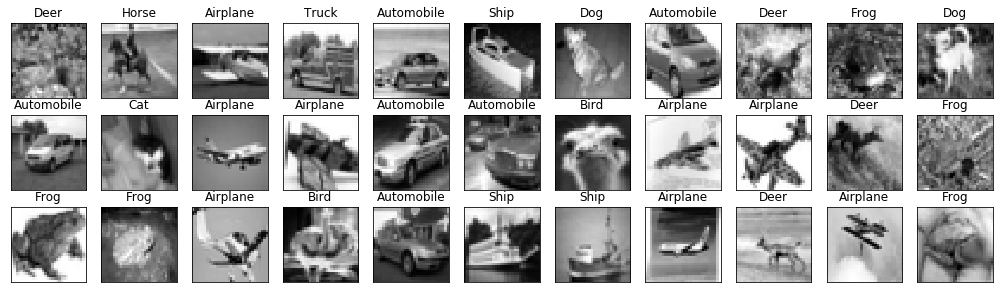

In [11]:
# A sample of my training image set
plot_gallery(greyscale_images, labels[train_image_labels], h, w)

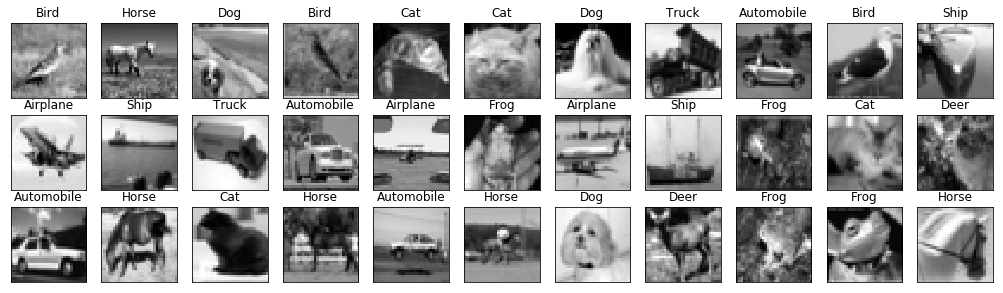

In [49]:
# A sample of my test image set
plot_gallery(test_images, labels[test_image_labels], h, w)

<h1>Data Reduction</h1>
<h2>Linear Dimensionality Reduction - Principal Components Analysis</h2>

In [12]:
from sklearn.decomposition import PCA

n_components = 200
print ("Extracting the top %d components from %d images" % (
    n_components, greyscale_images.shape[0]))

pca = PCA(n_components = n_components)
%time pca.fit(greyscale_images.copy())
eigen_images = pca.components_.reshape((n_components, h, w))

Extracting the top 200 components from 3000 images
Wall time: 410 ms


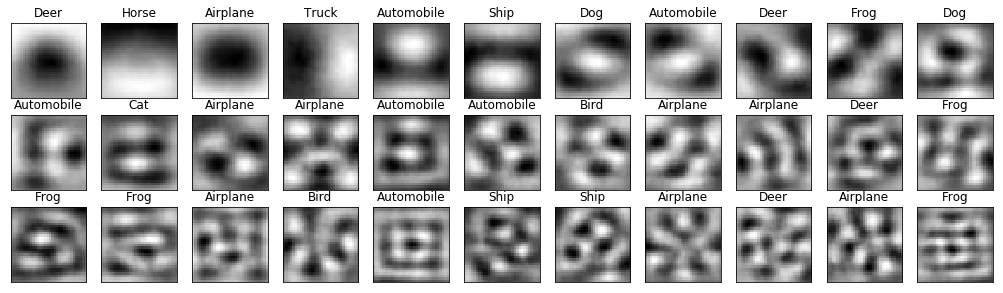

In [13]:
plot_gallery(eigen_images, labels[train_image_labels] ,h, w)

<h3>Explained Variance</h3>

In [14]:
import plotly
import plotly.plotly as py
plotly.tools.set_credentials_file(username='tete9000', api_key='936qqajHBpvuiyFBHpZL')
from plotly.graph_objs import *
    
explained_var = pca.explained_variance_ratio_*100
cum_var_exp = np.cumsum(explained_var)
    
py.iplot({
     "data": [Bar(y=explained_var, name='individual explained variance'),
             Scatter(y=cum_var_exp, name='cumulative explained variance')
         ],
      "layout": Layout(xaxis=XAxis(title='Principal components'), yaxis=YAxis(title='Explained variance ratio'))
})

<p>The number of components specified for the PCA is 200 out of the original 32x32 = 1024 of the image data. Those 200 describe 96.5% of the variance in the image data as seen in the figure above. I conclude that 200 dimensions are a good enough representation of the images.</p>

<h2>Non-Linear Dimensionality Reduction - Kernel PCA</h2>

In [15]:
%%time
from sklearn.decomposition import KernelPCA

n_components = 200
print ("Extracting the top %d components from %d images" % (
    n_components, greyscale_images.shape[0]))

kpca = KernelPCA(n_components = n_components, 
                kernel='rbf', 
                fit_inverse_transform = True, gamma=50,
                remove_zero_eig = True)  

kpca.fit(greyscale_images)

Extracting the top 200 components from 3000 images
Wall time: 6.41 s


<p>I have tried different values for gamma for the kernel PCA, and I have decided to use 50, as classification performance was extremely low for lower gamma values. It also captures many of the features of the original data at this value. Also, I left the fit_inverse_transform parameter to later visualize the images.</p>

In [16]:
import pickle

file1 = open('pca_data', 'wb')
file2 = open( 'kpca_data', 'wb' )

pickle.dump(pca, file1)
pickle.dump(kpca, file2)

<p>Here I am saving the PCAs for later use.</p>

<h2>PCA Methods Comparisons</h2>
<h3>Qualitative Measure</h3>

In [18]:
# This function displays a 100 images set comparing the original image with its reconstructed 
# versions from linear and kernel PCAs.

def plot_gallery(images, titles, h, w, n_row = 30, n_col = 3):
    
    plt.figure(figsize = (5 * n_col, 5 * n_row))
    counter = 1
    pca = pickle.load(open( 'pca_data', 'rb' ))
    kpca = pickle.load(open( 'kpca_data', 'rb' ))
        
    for i in range(n_row):
        reconstructed_image_pca = pca.inverse_transform(pca.transform(greyscale_images[i].reshape(1, -1)))
        reconstructed_image_kpca = kpca.inverse_transform(kpca.transform(greyscale_images[i].reshape(1, -1)))

        plt.subplot(n_row, n_col, counter)
        plt.imshow(greyscale_images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        counter+=1

        plt.subplot(n_row, n_col, counter)
        plt.imshow(reconstructed_image_pca.reshape((h, w)), cmap=plt.cm.gray)
        plt.title("Linear PCA", size=12)
        counter+=1

        plt.subplot(n_row, n_col, counter)
        plt.imshow(reconstructed_image_kpca.reshape((h, w)), cmap=plt.cm.gray)
        plt.title("Kernel PCA", size=12)
        counter+=1

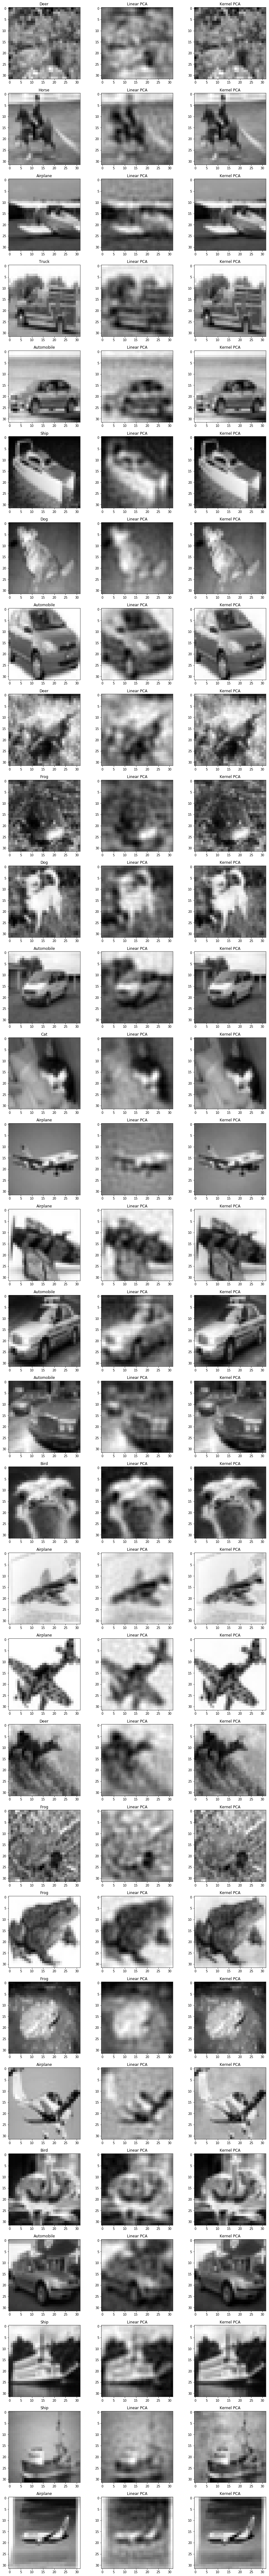

In [19]:
plot_gallery(greyscale_images, labels[train_image_labels], h, w)

<p>The images above were reconstructed from Linear PCA and Kernel PCA. 200 principle components were used in reconstructing the images. It is quite obvious that Kernel PCA (with a gamma parameter of 50) produced better quality images (in terms of visuals only, compared to the original images) as can be seen above. The first image in each row is the original image with its title above it, the second image is its reconstruction from Linear PCA, and the third image is its reconstruction from Kernel PCA.</p>

<h3>Quantitative Measure: Neighbor Classifier - Visualization and Score</h3>

In [31]:
# Here, I am going to test the mean accuracy of the classifier when given kernel-PCA-processed images 
# and linear-PCA-processed images

from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=1, algorithm='brute', p=2)
neigh.fit(greyscale_images, labels[train_image_labels])

pca = pickle.load(open( 'pca_data', 'rb' ))
kpca = pickle.load(open( 'kpca_data', 'rb' ))

kpca_images = np.zeros((n_samples, n_features))
pca_images = np.zeros((n_samples, n_features))

for i in range(n_samples):
    pca_images[i,:] = (pca.inverse_transform(pca.transform(greyscale_images[i].reshape(1, -1))))
    kpca_images[i,:] = (kpca.inverse_transform(kpca.transform(greyscale_images[i].reshape(1, -1))))

# Here I am testing the mean accuracy score of label prediction for 3 cases
# Case 1: The test image subset (1000 images)
# Case 2: The PCA-reconstructed images
# Case 3: The kernel-PCA Reconstructed images

test_images_score = neigh.score(test_images, labels[test_image_labels])
pca_score = neigh.score(pca_images, labels[train_image_labels])
kpca_score = neigh.score(kpca_images, labels[train_image_labels])

print("The score of classification for the Kernel-PCA-processed images is: ", kpca_score*100, "%")
print("The score of classification for the Linear-PCA-processed images is: ", pca_score*100, "%")
print("The score of classification for the test images is: ", test_images_score*100, "%")

The score of classification for the Kernel-PCA-processed images is:  17.3666666667 %
The score of classification for the Linear-PCA-processed images is:  100.0 %
The score of classification for the test images is:  22.3 %


<p>The model was created from the training images dataset. In the object instance of the classifier, I have chosen to use a brute force algorithm and the distance to be a Euclidean distance.</p>

<p>As can be seen from the results of the scikit-learn KNeighborsClassifier, the images reconstructed from Linear PCA have resulted in significantly better classification performance than corresponding images reconstructed from Kernel-PCA. This can be seen from the mean accuracy score for each PCA type, which shows that the classifier has successfully identified the labels for 100% of the training images produced by Linear PCA. The same classifier could only identify 17.36% of the labels for the training images produced by Kernel-PCA. The same classifier was able to label 22.3% of the test image subset. Quantitavely speaking, Linear PCA has produced much better images for the classifier, despite the better quality images (visually) produced by Kernel PCA.

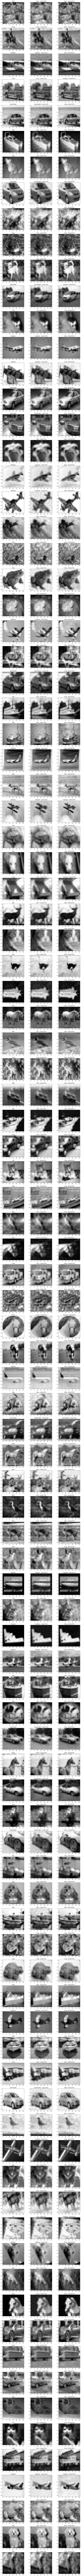

In [33]:
# Visualization of the above classifer
# This function displays a 100 image set comparing the original labeled image with its label-predicted reconstructed 
# versions from linear and kernel PCAs.
# Also, the accuracy score for this small subset of images is manually calculated as shown in the code below

n_row = 100
n_col = 3
plt.figure(figsize = (5 * n_col, 5 * n_row))
counter = 1
pca_score = 0
kpca_score = 0

for i in range(n_row):
    pca_image = pca_images[i]
    kpca_image = kpca_images[i]
    
    plt.subplot(n_row, n_col, counter)
    plt.imshow(greyscale_images[i].reshape((h, w)), cmap=plt.cm.gray)
    plt.title(labels[train_image_labels[i]], size=12)
    counter+=1

    title = neigh.predict(pca_image.reshape((1,-1)))[0]
    plt.subplot(n_row, n_col, counter)
    plt.imshow(pca_image.reshape((h, w)), cmap=plt.cm.gray)
    plt.title(title + " - Linear PCA", size=12)
    counter+=1
    if (title == labels[train_image_labels[i]]):
        pca_score += 1

    title = neigh.predict(kpca_image.reshape((1,-1)))[0]
    plt.subplot(n_row, n_col, counter)
    plt.imshow(kpca_image.reshape((h, w)), cmap=plt.cm.gray)
    plt.title(title + " - Kernel PCA", size=12)
    counter+=1
    if (title == labels[train_image_labels[i]]):
        kpca_score += 1

In [50]:
# Manual score calculation for the subset of 100 images visualized above
print("The mean score for the neighbor classifer using 100 Kernel-PCA-Processed images was calculated to be", kpca_score/n_row)
print("The mean score for the neighbor classifer using 100 Linear-PCA-Processed images was calculated to be", pca_score/n_row)

The mean score for the neighbor classifer using 100 Kernel-PCA-Processed images was calculated to be 0.22
The mean score for the neighbor classifer using 100 Linear-PCA-Processed images was calculated to be 1.0


<p>The k-neighbor classifier is being visualized in the figure above for a subset of 100 images. The score is also being computed manually for each image instance. The original image is shown first along with its given label, then the same image reconstructed from Linear PCA is shown along with its <b>predicted</b> label, and then the same image reconstructed from Kernel PCA along with its <b>predicted</b> label is shown. The better performance of Linear PCA for the classifier is clear in the figure. Also, the mean classification score is manually calculated for each PCA subset (kernel and linear).</p>
<p>Let's see how DAISY peforms in comparison.</p>

<h2>Feature Extraction: DAISY</h2>

In [35]:
from skimage.feature import daisy

def apply_daisy(row, shape):
    feat = daisy(row.reshape(shape), step=4, radius=2, rings=3, histograms=5, orientations=8, visualize=False)
    return feat.reshape((-1))

%time daisy_features = np.apply_along_axis(apply_daisy, 1, greyscale_images, (h,w))
print(daisy_features.shape)

Wall time: 17.4 s
(3000, 6272)


<p>Here we define a function to apply the daisy class for each image of the dataset.</p>

In [37]:
from sklearn.metrics.pairwise import pairwise_distances
%time dist_matrix = pairwise_distances(daisy_features)

Wall time: 896 ms


<h2>Performance Analysis of DAISY</h2>
<h3>Nearest Neighbor Classifier - Visualization and Score</h3>

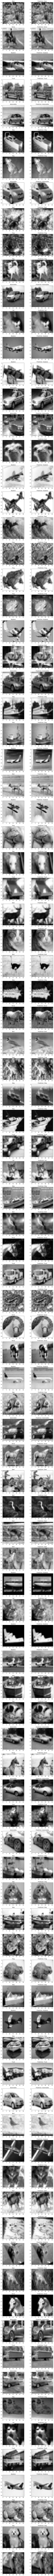

In [38]:
# I am using scikit-learn KNeighborsClassifier again to build a classifier based on DAISY features of the images
# Again, I am using a brute force algorithm and the Euclidean distance as a measure
# I am also evaluating the overall score of the image set

# Defining the object instance of the classifier
daisy_classifier = KNeighborsClassifier(n_neighbors=1, algorithm='brute', p=2)
daisy_classifier.fit(daisy_features, labels[train_image_labels])
# Evaluating the score of the training dataset (the one I used to extract the features)
train_images_score = daisy_classifier.score(daisy_features, labels[train_image_labels])

# Evaluating the score for the test dataset
test_daisy_features = np.apply_along_axis(apply_daisy, 1, test_images, (h,w))
test_images_score = daisy_classifier.score(test_daisy_features, labels[test_image_labels])

# Visualization of the daisy classifer - Here I am visualizing a 100 image set and manually calculating the score for this subset

n_row = 100
n_col = 2
plt.figure(figsize = (5 * n_col, 5 * n_row))
counter = 1
score = 0

image_subset = greyscale_images[0:n_row]
image_subset_labels = labels[train_image_labels[0:n_row]]



for i in range(n_row):
    image = image_subset[i]
    feat = daisy(image.reshape((h, w)), step=4, radius=2, rings=3, histograms=5, orientations=8, visualize=False).reshape((-1))
    
    plt.subplot(n_row, n_col, counter)
    plt.imshow(image.reshape((h, w)), cmap=plt.cm.gray)
    plt.title(image_subset_labels[i], size=12)
    counter+=1

    title = daisy_classifier.predict(feat.reshape((1,-1)))[0]
    plt.subplot(n_row, n_col, counter)
    plt.imshow(image.reshape((h, w)), cmap=plt.cm.gray)
    plt.title("Prediction: " + title, size=12)
    counter+=1
    
    if (title == image_subset_labels[i]):
        score += 1

In [41]:
print("The manual score calculated for the 100 subset of images  = ", float(score/n_row)*100, "%")
print("The score of the above DAISY classifier for the images of the training dataset  = ", float(train_images_score)*100, "%")
print("The score of the above DAISY classifier for the images of the test dataset  = ", float(test_images_score)*100, "%")

The manual score calculated for the 100 subset of images  =  100.0 %
The score of the above DAISY classifier for the images of the training dataset  =  100.0 %
The score of the above DAISY classifier for the images of the test dataset  =  28.799999999999997 %


<p>Both DAISY and Linear PCA were able to predict 100% of the classes of the training images. This means that both capture useful identifying features of my images. For the test images dataset, DAISY is doing slightly better in classification performance than Linear PCA. It scored 28.8% in labeling the 1000 images of the test image set, whereas Linear PCA scored 22.3% in labeling the same set. So far, DAISY is the best processing tool for the classifier I am using.</p>

<h3>Pairwise Distances - Visualization and Score</h3>

<p>The below widget visualizes the closest image to a given image based on the pairwise distances of the daisy features.</p>

In [45]:
import copy
from ipywidgets import fixed, widgets
from skimage.io import imshow

def closest_image(dmat,idx1):
    distances = copy.deepcopy(dmat[idx1,:])
    distances[idx1] = np.infty
    idx2 = np.argmin(distances)
    
    plt.figure(figsize=(10,16))
    plt.subplot(1,2,1)
    plt.imshow(greyscale_images[idx1].reshape((h,w)), cmap=plt.cm.gray)
    plt.title("Original Image "+labels[train_image_labels[idx1]])
    plt.grid()

    plt.subplot(1,2,2)
    imshow(greyscale_images[idx2].reshape((h,w)), cmap=plt.cm.gray)
    plt.title("Closest Image  "+labels[train_image_labels[idx2]])
    plt.grid()
    
widgets.interact(closest_image,idx1=(0,n_samples-1,1),dmat=fixed(dist_matrix),__manual=True)

interactive(children=(IntSlider(value=1499, description='idx1', max=2999), Output()), _dom_classes=('widget-interact',))

<function __main__.closest_image>

In [46]:
score = 0
for index in range(n_samples):
    
    distances = copy.deepcopy(dist_matrix[index,:])
    distances[index] = np.infty
    index2 = np.argmin(distances)
    
    if labels[train_image_labels[index]] == labels[train_image_labels[index2]]:
        score +=1

print("The score of the pairwise distances classifier for images of the training dataset = ", float(score/n_samples)*100, "%")

The score of the pairwise distances classifier for images of the training dataset =  26.333333333333332 %


<p>The pairwise distances classifier was able to identify 26.3% of the images of the training set. It is inferior to the scikit-learn KNeighborsClassifier, which was able to provide a 100% accuracy for the <b>training</b> image set (the one used to build the model).</p>

<h1>Conclusion</h1>
<p>The best image processing tool for my images was found to be DAISY (of the ones I employed here), and it yielded a score of 100% for my training image set (3000 images) and 28.8% for my test image set. This classification performance would be very poor for my business case. A cloud image classification service would need to be near-perfect to be useful. Identifying a cat as a car is unacceptable. More proper methods need to be employed to better classify the images.</p>

<p>However, I believe that my images being small did not help. After all, processing tools such as DAISY and others collect features for identification purposes. 32x32 are too small for better utilization of those processing tools. For larger images (say 100x100), I believe the same processing tools would have yielded significantly better classification performance (using the same classifiers) than what I have obtained using my images.</p>